In [1]:
import numpy as np
import pandas as pd
import ruamel.yaml as yaml
from pathlib import Path
import seaborn as sns
from matplotlib import pyplot as plt

## Find results files

In [2]:
seeds = [1, 2, 3, 4, 5]
# results_folder = Path('../results/3S1L')
results_folder = Path('../results/1S3L')

In [3]:
experiment_results = list(sorted(results_folder.glob('user_experience_*/results.yaml')))

In [4]:
def is_valid_seed(results_file):
    try:
        seed = int(results_file.parts[-2].split("_")[-1])
        return seed in seeds
    except ValueError:
        return False
experiment_results = list(filter(is_valid_seed, experiment_results))

## Load results

In [5]:
results = []
for results_file in experiment_results:
    with open(results_file, 'r') as f:
        data = yaml.safe_load(f)
        data['experiment_name'] = results_file.parts[-2][:-2]
        data['seed'] = int(results_file.parts[-2].split("_")[-1])
        results.append(data)

In [6]:
results = pd.DataFrame.from_dict(results)
results.insert(0, 'seed', results.pop('seed'))
results.insert(0, 'experiment_name', results.pop('experiment_name'))
results

,experiment_name,seed,delay_avg,delay_max,dispatch_time,dispatch_time_count,dispatch_time_total,jobs_delayed,jobs_delayed_percentage,jobs_late,...,duration_predictor_inference_time_total,duration_predictor_training_time,duration_predictor_training_time_count,duration_predictor_training_time_total,worker_selector_inference_time,worker_selector_inference_time_count,worker_selector_inference_time_total,worker_selector_training_time,worker_selector_training_time_count,worker_selector_training_time_total
0,user_experience_limits,1,12.302401,17774.057000,0.000008,562798,4.674301,1418,0.002520,6284,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,user_experience_limits,2,12.302401,17774.057000,0.000008,562798,4.612752,1418,0.002520,6284,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,user_experience_limits,3,12.302401,17774.057000,0.000008,562798,4.635352,1418,0.002520,6284,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,user_experience_limits,4,12.302401,17774.057000,0.000008,562798,4.593612,1418,0.002520,6284,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,user_experience_limits,5,12.302401,17774.057000,0.000008,562798,4.653641,1418,0.002520,6284,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,user_experience_nn,1,10.252757,16378.395000,0.002700,562798,1519.622685,1405,0.002496,5982,...,1506.933261,0.559380,1133.0,633.776985,NaN,NaN,NaN,NaN,NaN,NaN
6,user_experience_nn,2,10.256037,16378.395000,0.002753,562798,1549.106817,1346,0.002392,6033,...,1536.520667,0.561796,1133.0,636.514909,NaN,NaN,NaN,NaN,NaN,NaN
7,user_experience_nn,3,10.277288,16378.395000,0.002719,562798,1530.242951,1403,0.002493,6075,...,1517.827629,0.553827,1133.0,627.485558,NaN,NaN,NaN,NaN,NaN,NaN
8,user_experience_nn,4,9.483759,16378.395000,0.002674,562798,1504.901041,1404,0.002495,5876,...,1492.366531,0.555417,1133.0,629.287252,NaN,NaN,NaN,NaN,NaN,NaN
9,user_experience_nn,5,10.201619,16378.395000,0.002688,562798,1512.769733,1324,0.002353,6093,...,1500.386872,0.553283,1133.0,626.869307,NaN,NaN,NaN,NaN,NaN,NaN


C:\Users\micha\AppData\Local\Temp\ipykernel_20092\457404338.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  p.set_xticklabels([t.get_text()[16:] for t in p.get_xticklabels()], rotation=90)


[Text(0, 0, 'limits'),
 Text(1, 0, 'nn'),
 Text(2, 0, 'nn_embedding'),
 Text(3, 0, 'oracle'),
 Text(4, 0, 'rl_embedding'),
 Text(5, 0, 'rl_embedding_fast'),
 Text(6, 0, 'rl_nn_fast'),
 Text(7, 0, 'rl_oracle'),
 Text(8, 0, 'rl_oracle_fast'),
 Text(9, 0, 'stats'),
 Text(10, 0, 'zero')]

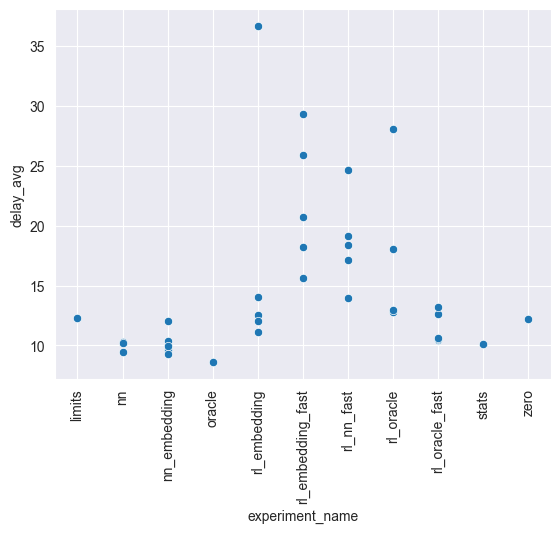

In [14]:
p = sns.scatterplot(data=results, x='experiment_name', y='delay_avg')
p.set_xticklabels([t.get_text()[16:] for t in p.get_xticklabels()], rotation=90)

## Compute aggregate metrics

In [8]:
results_agg = results.drop(columns=["seed", "simulation_duration"]).groupby('experiment_name').agg(["mean", "std"])
results_agg

delay_avg              delay_max  \
                                        mean        std        mean   
experiment_name                                                       
user_experience_limits             12.302401   0.000000  17774.0570   
user_experience_nn                 10.094292   0.342429  16378.3950   
user_experience_nn_embedding       10.243985   1.083224  15938.4758   
user_experience_oracle              8.605884   0.000000  14962.0000   
user_experience_rl_embedding       17.283908  10.875245  30455.1686   
user_experience_rl_embedding_fast  21.949865   5.602846  21708.3554   
user_experience_rl_nn_fast         18.639032   3.892032  25738.2010   
user_experience_rl_oracle          16.962568   6.581531  30760.8184   
user_experience_rl_oracle_fast     11.482961   1.326179  34151.8246   
user_experience_stats              10.145549   0.000000  17774.0570   
user_experience_zero               12.203147   0.000000  11452.0700   

                                               dispatch_time            \
                                           std          mean       std   
experiment_name                                                          
user_experience_limits                0.000000      0.000008  0.000000   
user_experience_nn                    0.000000      0.002707  0.000031   
user_experience_nn_embedding        983.689236      0.003442  0.000033   
user_experience_oracle                0.000000      0.000008  0.000000   
user_experience_rl_embedding       6599.480815      0.004471  0.000058   
user_experience_rl_embedding_fast  3785.503893      0.004323  0.000054   
user_experience_rl_nn_fast         4315.424526      0.003617  0.000058   
user_experience_rl_oracle          8643.844710      0.000786  0.000007   
user_experience_rl_oracle_fast     4019.167135      0.000772  0.000006   
user_experience_stats                 0.000000      0.000009  0.000000   
user_experience_zero                  0.000000      0.000008  0.000000   

                                  dispatch_time_count       \
                                                 mean  std   
experiment_name                                              
user_experience_limits                       562798.0  0.0   
user_experience_nn                           562798.0  0.0   
user_experience_nn_embedding                 562798.0  0.0   
user_experience_oracle                       562798.0  0.0   
user_experience_rl_embedding                 562798.0  0.0   
user_experience_rl_embedding_fast            562798.0  0.0   
user_experience_rl_nn_fast                   562798.0  0.0   
user_experience_rl_oracle                    562798.0  0.0   
user_experience_rl_oracle_fast               562798.0  0.0   
user_experience_stats                        562798.0  0.0   
user_experience_zero                         562798.0  0.0   

                                  dispatch_time_total             ...  \
                                                 mean        std  ...   
experiment_name                                                   ...   
user_experience_limits                       4.633932   0.031994  ...   
user_experience_nn                        1523.328645  17.154614  ...   
user_experience_nn_embedding              1936.740510  18.310763  ...   
user_experience_oracle                       4.549445   0.113421  ...   
user_experience_rl_embedding              2516.170635  32.716403  ...   
user_experience_rl_embedding_fast         2433.171958  30.092717  ...   
user_experience_rl_nn_fast                2035.542808  32.664660  ...   
user_experience_rl_oracle                  442.686071   4.121607  ...   
user_experience_rl_oracle_fast             434.441941   3.107299  ...   
user_experience_stats                        5.009977   0.065484  ...   
user_experience_zero                         4.599415   0.097442  ...   

                                  worker_selector_inference_time_count       \
                                

## Print user experience results for paper

In [9]:
variants = {
    "user_experience_stats": "statistics",
    "user_experience_oracle": "oracle",
    "user_experience_nn": "NN",
    "user_experience_rl_oracle_fast": "RL + oracle",
    "user_experience_rl_nn_fast": "RL + NN",
}

In [10]:
for variant in variants:
    print(f"{variants[variant]:<12}& "
          f"{results_agg.loc[variant, ('jobs_on_time_percentage', 'mean')] * 100:.2f}\\% & "
          f"{results_agg.loc[variant, ('jobs_delayed_percentage', 'mean')] * 100:.2f}\\%  & "
          f"{results_agg.loc[variant, ('jobs_late_percentage', 'mean')] * 100:.2f}\\% & "
          f"{results_agg.loc[variant, ('delay_avg', 'mean')]:.2f} s \\\\")

statistics  & 98.75\% & 0.26\%  & 0.99\% & 10.15 s \\
oracle      & 98.81\% & 0.26\%  & 0.93\% & 8.61 s \\
NN          & 98.69\% & 0.24\%  & 1.07\% & 10.09 s \\
RL + oracle & 98.58\% & 0.29\%  & 1.13\% & 11.48 s \\
RL + NN     & 98.38\% & 0.27\%  & 1.35\% & 18.64 s \\


## Print time results for paper

In [11]:
results.columns

Index(['experiment_name', 'seed', 'delay_avg', 'delay_max', 'dispatch_time',
       'dispatch_time_count', 'dispatch_time_total', 'jobs_delayed',
       'jobs_delayed_percentage', 'jobs_late', 'jobs_late_percentage',
       'jobs_on_time', 'jobs_on_time_percentage', 'jobs_total',
       'simulation_duration', 'simulation_duration_s',
       'duration_predictor_inference_time',
       'duration_predictor_inference_time_count',
       'duration_predictor_inference_time_total',
       'duration_predictor_training_time',
       'duration_predictor_training_time_count',
       'duration_predictor_training_time_total',
       'worker_selector_inference_time',
       'worker_selector_inference_time_count',
       'worker_selector_inference_time_total', 'worker_selector_training_time',
       'worker_selector_training_time_count',
       'worker_selector_training_time_total'],
      dtype='object')

In [12]:
for variant in variants:
    def format_time(time_column, prec=1):
        val = results_agg.loc[variant, (time_column, 'mean')]
        if pd.isna(val):
            return "--"
        return f"{val * 1000:.{prec}f} ms"
    print(f"{variants[variant]:<12}& "
          f"{format_time('dispatch_time', 2)} & "
          f"{format_time('duration_predictor_inference_time')} & "
          f"{format_time('duration_predictor_training_time')} & "
          f"{format_time('worker_selector_inference_time')} & "
          f"{format_time('worker_selector_training_time')} \\\\")

statistics  & 0.01 ms & -- & -- & -- & -- \\
oracle      & 0.01 ms & -- & -- & -- & -- \\
NN          & 2.71 ms & 2.7 ms & 556.7 ms & -- & -- \\
RL + oracle & 0.77 ms & -- & -- & 0.8 ms & 136.0 ms \\
RL + NN     & 3.62 ms & 2.8 ms & 593.8 ms & 0.8 ms & 139.8 ms \\
